In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os
from skimage.io import imread
import seaborn as sns


## Import files

In [12]:
if not os.path.exists('output'):
    os.makedirs('output')

# Load data
after_dir ='26_08_2021'
before_dir = '29_07_2021'

band_names = ['B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12'.split(',')]
# Load the image
image = imread(f'{before_dir}/B01_07_2021.tiff')

before_multispectral = np.dstack((  
                                    imread(f'{before_dir}/B01_07_2021.tiff'),
                                    imread(f'{before_dir}/B02_07_2021.tiff'),
                                    imread(f'{before_dir}/B03_07_2021.tiff'),
                                    imread(f'{before_dir}/B04_07_2021.tiff'),
                                    imread(f'{before_dir}/B05_07_2021.tiff'),
                                    imread(f'{before_dir}/B06_07_2021.tiff'),
                                    imread(f'{before_dir}/B07_07_2021.tiff'),
                                    imread(f'{before_dir}/B08_07_2021.tiff'),
                                    imread(f'{before_dir}/B8A_07_2021.tiff'),
                                    imread(f'{before_dir}/B09_07_2021.tiff'),
                                    imread(f'{before_dir}/B11_07_2021.tiff'),
                                    imread(f'{before_dir}/B12_07_2021.tiff')
                                    ))

after_multispectral = np.dstack((
                                    imread(f'{after_dir}/B01_08_2021.tiff'),
                                    imread(f'{after_dir}/B02_08_2021.tiff'),
                                    imread(f'{after_dir}/B03_08_2021.tiff'),
                                    imread(f'{after_dir}/B04_08_2021.tiff'),
                                    imread(f'{after_dir}/B05_08_2021.tiff'),
                                    imread(f'{after_dir}/B06_08_2021.tiff'),
                                    imread(f'{after_dir}/B07_08_2021.tiff'),
                                    imread(f'{after_dir}/B08_08_2021.tiff'),
                                    imread(f'{after_dir}/B8A_08_2021.tiff'),
                                    imread(f'{after_dir}/B09_08_2021.tiff'),
                                    imread(f'{after_dir}/B11_08_2021.tiff'),
                                    imread(f'{after_dir}/B12_08_2021.tiff')
                                    ))





## PCA

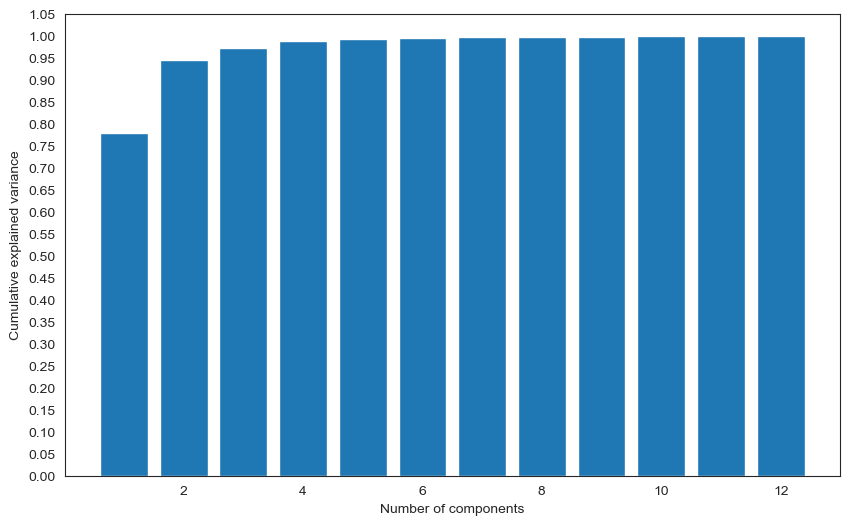

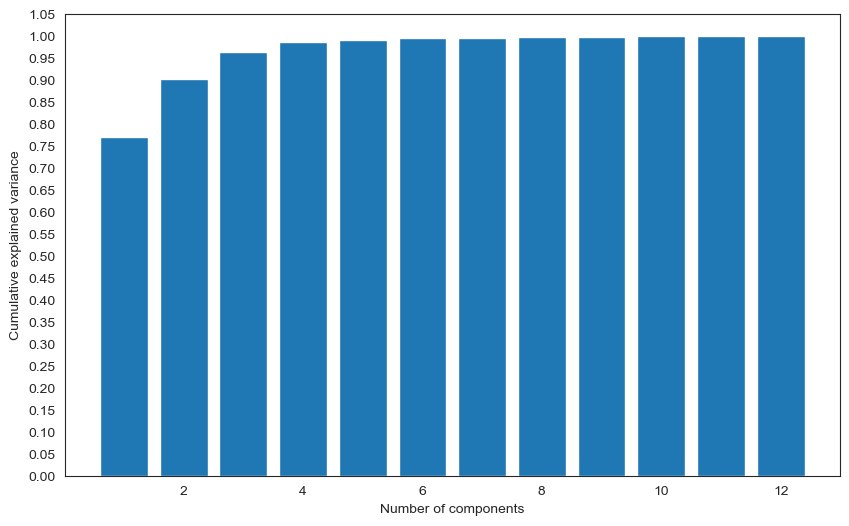

In [14]:
def pca_analysis(multispectral_image, band_names):
    # Reshape the image to a 2D array
    rows, cols, n_bands = multispectral_image.shape
    image_flattened = multispectral_image.reshape((rows * cols, n_bands))

    # Standardize the data
    scaler = StandardScaler()
    image_flattened_scaled = scaler.fit_transform(image_flattened)

    # Create the PCA model
    pca = PCA(n_components=12)

    # Fit the PCA model
    pca.fit(image_flattened_scaled)

    # Plot the cumulative explained variances as a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(1, 13), pca.explained_variance_ratio_.cumsum())
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    # Put the y ticks with 0.1 intervals
    plt.yticks(np.arange(0, 1.1, 0.05))
    plt.show()

    

    # Transform the data
    image_transformed = pca.transform(image_flattened_scaled)

    return image_transformed

before_pca = pca_analysis(before_multispectral, band_names)
after_pca = pca_analysis(after_multispectral, band_names)

    # # Reshape the transformed image back to the original image shape
    # image_back = image_transformed.reshape((rows, cols, n_bands))


## Plot change detection

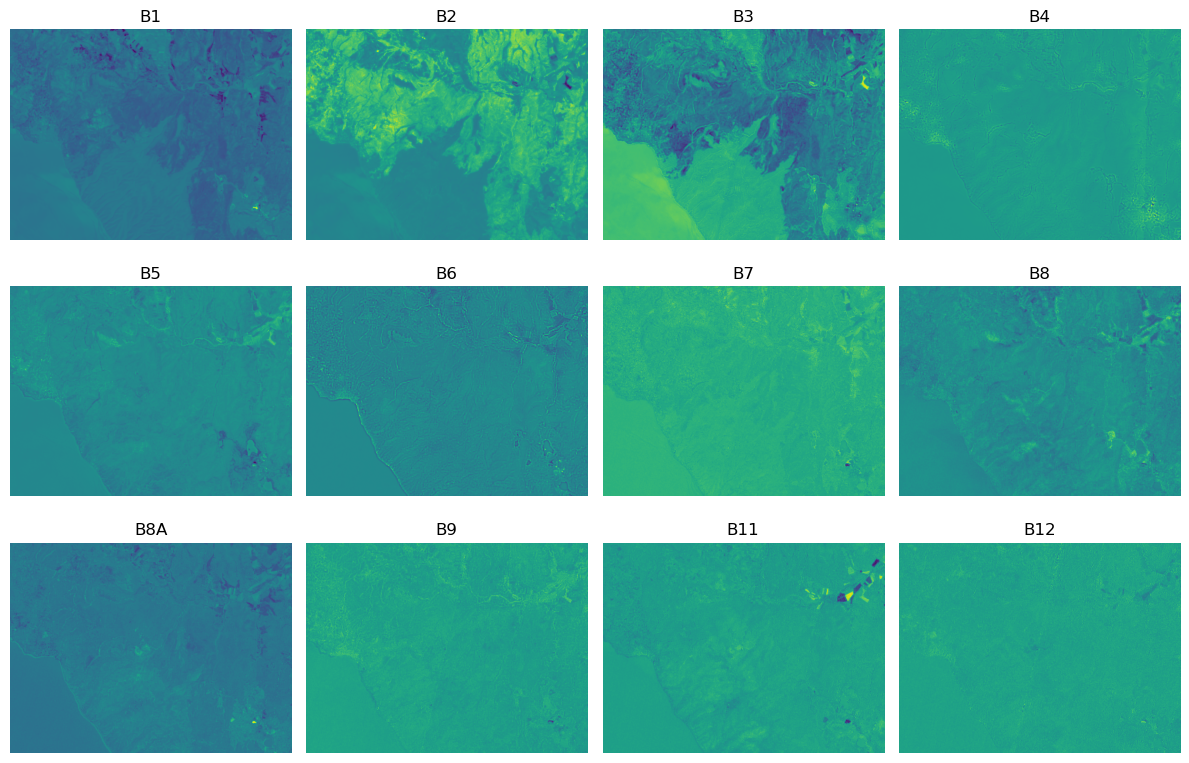

In [ ]:
change_detection = after_pca - before_pca

# Reshape the transformed image back to the original image shape
rows, cols, n_bands = before_multispectral.shape
change_detection_image = change_detection.reshape((rows, cols, n_bands))

# Plot the bands
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes = axes.flatten()
for i in range(12):
    axes[i].imshow(change_detection_image[:, :, i], cmap='viridis')
    axes[i].set_title(band_names[0][i])
    axes[i].axis('off')
plt.tight_layout()
plt.savefig('output/change_detection_bands_PCA.png', dpi=300)
plt.show()


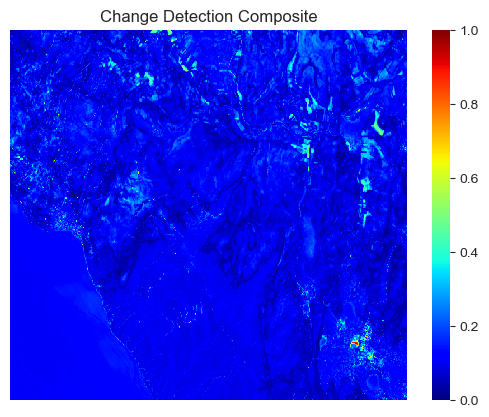

In [18]:
# Calculate the magnitude of changes across all bands (principal components)
magnitude_of_changes = np.linalg.norm(change_detection_image, axis=2)

# Normalize the magnitude to the range [0, 1]
normalized_changes = (magnitude_of_changes - np.min(magnitude_of_changes)) / (np.max(magnitude_of_changes) - np.min(magnitude_of_changes))

# Create a color composite using the normalized changes
color_composite = np.stack([normalized_changes] * 3, axis=2)  # Repeat the normalized changes for RGB channels

# Plot the color composite
sns.set_style('white')
sns.heatmap(normalized_changes, cmap='jet', vmax = 0.2, cbar=True)
plt.title('Change Detection Composite')
plt.axis('off')
plt.savefig('output/change_detection_PCA.png', dpi=300)
plt.show()
#
